<IMG SRC =excelrlogo.png/>

### ASSIGNMENT-18 -- FORECASTING ---Airlines_Data

#### PROBLEM STATEMENT

Forecast the CocaCola prices and Airlines Passengers data set. Prepare a document for each model explaining 
how many dummy variables you have created and RMSE value for each model. Finally which model you will use for 
Forecasting.

#### LIBRARIES

In [2]:
import numpy as np
import pandas as pd

In [4]:
Airlines_Data = pd.read_excel("Airlines_Data.xlsx")
Airlines_Data

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


#### TAKE THE BASIC INFORMATION FROM THE DATA

In [5]:
Airlines_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [6]:
Airlines_Data.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [7]:
Airlines_Data.shape

(96, 2)

In [8]:
Airlines_Data["year"]=Airlines_Data.Month.dt.strftime("%Y")
Airlines_Data["month"]=Airlines_Data.Month.dt.strftime("%b")
Airlines_Data

,Month,Passengers,year,month
0,1995-01-01,112,1995,Jan
1,1995-02-01,118,1995,Feb
2,1995-03-01,132,1995,Mar
3,1995-04-01,129,1995,Apr
4,1995-05-01,121,1995,May
...,...,...,...,...
91,2002-08-01,405,2002,Aug
92,2002-09-01,355,2002,Sep
93,2002-10-01,306,2002,Oct
94,2002-11-01,271,2002,Nov


In [9]:
Airlines_Data_Dumy = pd.get_dummies(Airlines_Data["month"])

In [10]:
lst = list(range(1,97))
Airlines_Data1 = pd.DataFrame(lst,columns=["t"])

In [12]:
lst = list(range(1,97))
Airlines_Data2 =pd.DataFrame(lst,columns=["t_square"])
Airlines_Data3 = Airlines_Data2**2.

In [14]:
X1 = Airlines_Data["Passengers"]
Airlines_Data["log_Passengers"] = np.log(X1)
Airlines_Data

,Month,Passengers,year,month,log_Passengers
0,1995-01-01,112,1995,Jan,4.718499
1,1995-02-01,118,1995,Feb,4.770685
2,1995-03-01,132,1995,Mar,4.882802
3,1995-04-01,129,1995,Apr,4.859812
4,1995-05-01,121,1995,May,4.795791
...,...,...,...,...,...
91,2002-08-01,405,2002,Aug,6.003887
92,2002-09-01,355,2002,Sep,5.872118
93,2002-10-01,306,2002,Oct,5.723585
94,2002-11-01,271,2002,Nov,5.602119


In [16]:
Airlines_Data = pd.concat([Airlines_Data,Airlines_Data_Dumy,Airlines_Data1,Airlines_Data3],axis=1)
Airlines_Data
Airlines_Data.columns

Index(['Month', 'Passengers', 'year', 'month', 'log_Passengers', 'Apr', 'Aug',
       'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep',
       't', 't_square'],
      dtype='object')

array([[<Axes: title={'center': 'Month'}>,
        <Axes: title={'center': 'Passengers'}>,
        <Axes: title={'center': 'log_Passengers'}>,
        <Axes: title={'center': 'Apr'}>],
       [<Axes: title={'center': 'Aug'}>, <Axes: title={'center': 'Dec'}>,
        <Axes: title={'center': 'Feb'}>, <Axes: title={'center': 'Jan'}>],
       [<Axes: title={'center': 'Jul'}>, <Axes: title={'center': 'Jun'}>,
        <Axes: title={'center': 'Mar'}>, <Axes: title={'center': 'May'}>],
       [<Axes: title={'center': 'Nov'}>, <Axes: title={'center': 'Oct'}>,
        <Axes: title={'center': 'Sep'}>, <Axes: title={'center': 't'}>],
       [<Axes: title={'center': 't_square'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

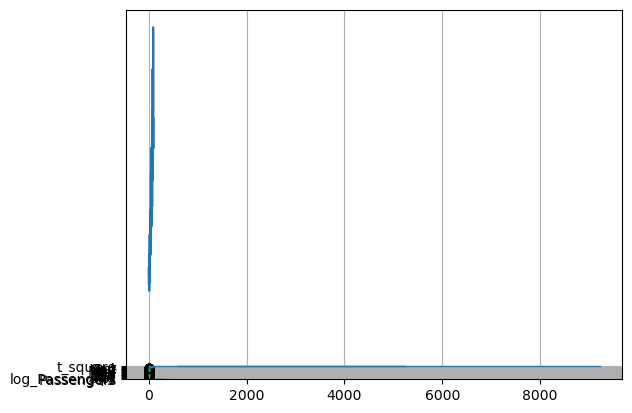

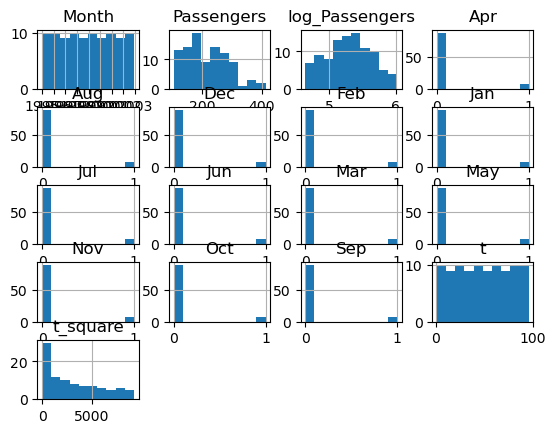

In [17]:
Airlines_Data["Passengers"].plot()
Airlines_Data.boxplot(vert=False)
Airlines_Data.hist()

In [19]:
Train = Airlines_Data.head(88)
Test = Airlines_Data.tail(8)

In [20]:
import statsmodels.formula.api as smf
linear_model=smf.ols('Passengers~year',data=Train).fit()
pred_linear=pd.Series(linear_model.predict(pd.DataFrame(Test['year'])))
rmse_linear=np.sqrt(np.mean(np.array(Test['Passengers'])-np.array(pred_linear))**2)
rmse_linear

45.75000000000108

In [21]:
import statsmodels.formula.api as smf
EXP=smf.ols('log_Passengers~year',data=Train).fit()
pred_EXP=pd.Series(EXP.predict(Test['year']))
rmse_EXP=np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_EXP)))**2))
rmse_EXP

66.63084737003285

In [22]:
Quadratic = smf.ols("Passengers~t+t_square",data=Train).fit()
pred_quad=pd.Series(Quadratic.predict(Test[["t","t_square"]]))
rmse_quad=np.sqrt(np.mean((np.array(Test["Passengers"])-np.array(pred_quad))**2))
rmse_quad

58.30476227447039

In [23]:
add_sea=smf.ols("Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec",data=Train).fit()
pred_add_sea=pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]))
rmse_add_sea=np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea)**2)))
rmse_add_sea

C:\Users\gk521\AppData\Local\Temp\ipykernel_2876\3243804510.py:3: RuntimeWarning: invalid value encountered in sqrt
  rmse_add_sea=np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea)**2)))


nan

In [24]:
add_sea_Quadratic=smf.ols("Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec",data=Train).fit()
pred_add_sea_Quadratic=pd.Series(add_sea_Quadratic.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]))
rmse_add_sea_Quadratic=np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea_Quadratic)**2)))
rmse_add_sea_Quadratic

C:\Users\gk521\AppData\Local\Temp\ipykernel_2876\918806156.py:3: RuntimeWarning: invalid value encountered in sqrt
  rmse_add_sea_Quadratic=np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea_Quadratic)**2)))


nan

In [25]:
Mul_sea=smf.ols("log_Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec",data=Train).fit()
pred_Mul_sea=pd.Series(Mul_sea.predict(Test))
rmse_Mul_sea=np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mul_sea)))**2))
rmse_Mul_sea

148.4557727402547

In [26]:
Mul_add_sea=smf.ols("log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec",data=Train).fit()
pred_Mul_add_sea=pd.Series(Mul_add_sea.predict(Test))
rmse_Mul_add_sea=np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mul_sea)))**2))
rmse_Mul_add_sea

148.4557727402547

In [27]:
data ={"MODEL":pd.Series(["rmse_linear","rmse_EXP","rmse_quad","rmse_add_sea","rmse_add_sea_Quadratic","rmse_Mul_sea","rmse_Mul_add_sea"])}
data1 ={"RMSE":pd.Series([rmse_linear,rmse_EXP,rmse_quad,rmse_add_sea,rmse_add_sea_Quadratic,rmse_Mul_sea,rmse_Mul_add_sea])}

In [28]:
a=pd.DataFrame(data)
b=pd.DataFrame(data1)
new=pd.concat([a,b],axis=1)
new

,MODEL,RMSE
0,rmse_linear,45.750000
1,rmse_EXP,66.630847
2,rmse_quad,58.304762
3,rmse_add_sea,NaN
4,rmse_add_sea_Quadratic,NaN
5,rmse_Mul_sea,148.455773
6,rmse_Mul_add_sea,148.455773


In [30]:
model_full =  smf.ols("Passengers~t+t_square",data = Airlines_Data).fit()

In [31]:
Airlines_Data.dtypes
Airlines_Data.drop(Airlines_Data.columns[[0,2,1,4]],axis=1,inplace=True)
Airlines_Data.columns

Index(['month', 'Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May',
       'Nov', 'Oct', 'Sep', 't', 't_square'],
      dtype='object')

In [32]:
pred_new = pd.Series(model_full .predict(Airlines_Data))
Airlines_Data["new_Passengers"] = pd.Series(pred_new)
Airlines_Data
Airlines_Data.columns
Airlines_Data["new_Passengers"]

0     119.158137
1     120.460303
2     121.784439
3     123.130544
4     124.498617
         ...    
91    327.618598
92    330.919950
93    334.243270
94    337.588559
95    340.955817
Name: new_Passengers, Length: 96, dtype: float64

### CONCLUSION

- The code demonstrates the application of various regression models for time series forecasting. However, it is important to explicitly state which model will be used for actual forecasting, based on the evaluation results. Additionally, consider adding some insights or analysis to provide context for the chosen model.

+ Linear Model: A linear model using 'year' as a predictor is evaluated. The RMSE for this model is calculated.
- Exponential Model: A model using the exponential of 'year' as a predictor is evaluated. The RMSE for this model is calculated.
+ Quadratic Model: A quadratic model using 't' and 't_square' as predictors is evaluated. The RMSE for this model is calculated.
- Seasonal Additive Models: Models using individual months as predictors are evaluated. 
+ The RMSE values for both additive and quadratic versions are calculated.
- Seasonal Multiplicative Models: Models using log-transformed 'Passengers' with months as predictors are evaluated. 
+ The RMSE values for both additive and quadratic versions are calculated.

### Thank You!